In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
module = fc.eightb.preselection.t8btag_minmass
signal = ObjIter([ Tree(f) for f in module.signal_list ])
bkg = ObjIter([ Tree(module.QCD_B_List), Tree(module.TTJets) ])
bkg.reweight(2.3)
bkg.set_systematics([0.2])

100%|██████████| 2/2 [00:01<00:00,  1.32it/s]


[None, None]

In [3]:
def get_point(label):
    label = label.split('_')
    return str((int(label[1]),int(label[3])))
signal_points = list(map(get_point,signal.sample)) 

In [4]:
dout = "gen_studies/recojets/"

# How does b-tag multiplicity increase higgs jet efficiency?

100%|██████████| 1/1 [00:03<00:00,  3.06s/it]


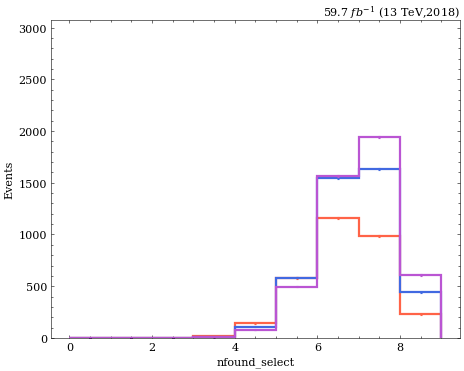

In [5]:
study.quick( 
    signal,
    varlist=['nfound_select'],
    dim=-1, 
)

100%|██████████| 3/3 [00:03<00:00,  1.27s/it]


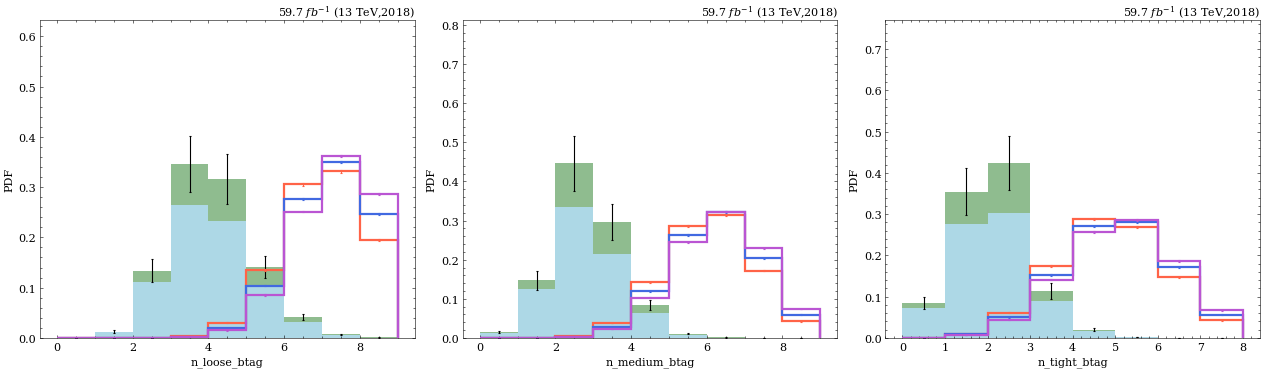

In [6]:
study.quick( 
    signal + bkg,
    efficiency=True,
    varlist=['n_loose_btag','n_medium_btag','n_tight_btag'],
    dim=-1, 
)

100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


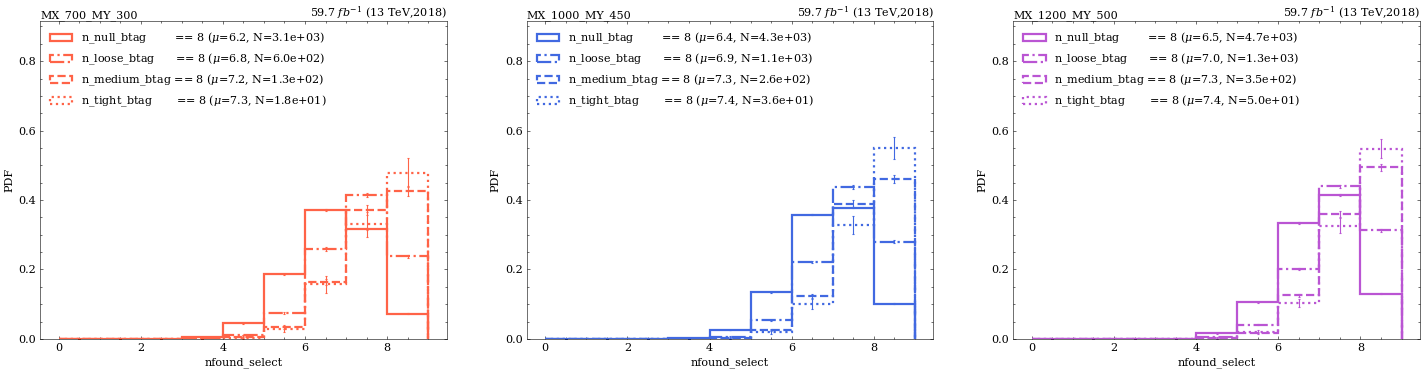

In [9]:
study.compare_masks(
    signal, legend=True,
    h_label_stat='$\mu$={stats.mean:0.1f}, N={stats.nevents:0.1e}',
    masks=[None, lambda t:t.n_loose_btag == 8, lambda t:t.n_medium_btag == 8, lambda t:t.n_tight_btag == 8],
    label=[ 'n_null_btag        == 8',
            'n_loose_btag      == 8',
            'n_medium_btag == 8',
            'n_tight_btag       == 8'],
    varlist=['nfound_select'],
    efficiency=True,
)

# Tighter cuts on b-tag multiplcitiy yield better higgs jet efficiency
# However it also cuts out a lot of events
# plus tighter cuts limit using these variables for background estimation
# Selecting the loosest cut that improves higgs jet efficiency considerably -> n_loose_btag

# Investigating the impact of looser multiplicities on n_loose_btag

100%|██████████| 1/1 [00:00<00:00,  1.06it/s]


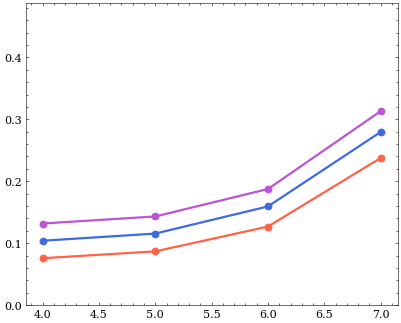

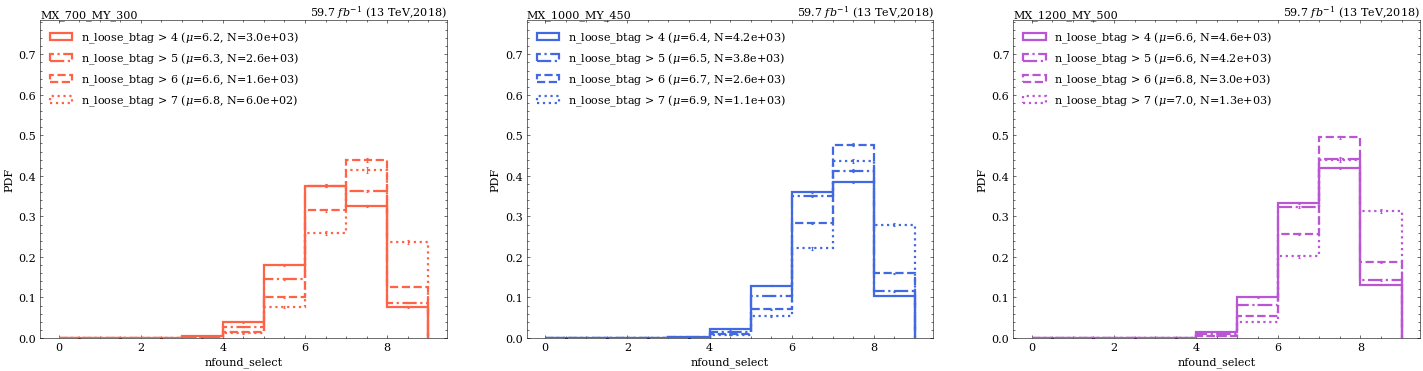

In [10]:
figax=study.get_figax()
def plot_mu_vs_n(histos, **kwargs):
    eff_8hjet = histos.histo.apply(lambda h : h[-1]).npy
    n_btag = np.arange(4, 8)
    graph_array(n_btag, eff_8hjet, figax=figax, g_color=histos[0].kwargs['color'])
    pass
study.compare_masks(
    signal, legend=True,
    h_label_stat='$\mu$={stats.mean:0.1f}, N={stats.nevents:0.1e}',
    masks=[lambda t:t.n_loose_btag > 4, lambda t:t.n_loose_btag > 5, lambda t:t.n_loose_btag > 6, lambda t:t.n_loose_btag > 7,],
    label=[ 
        'n_loose_btag > 4',
        'n_loose_btag > 5',
        'n_loose_btag > 6',
        'n_loose_btag > 7',
    ],
    varlist=['nfound_select'],
    efficiency=True,
    exe=plot_mu_vs_n
)

In [11]:
(signal+bkg).apply(lambda t: build_collection(t, 'H\dY\d_b\d', 'jet', ordered='ptRegressed'))

[None, None, None, None, None]

100%|██████████| 2/2 [00:02<00:00,  1.46s/it]


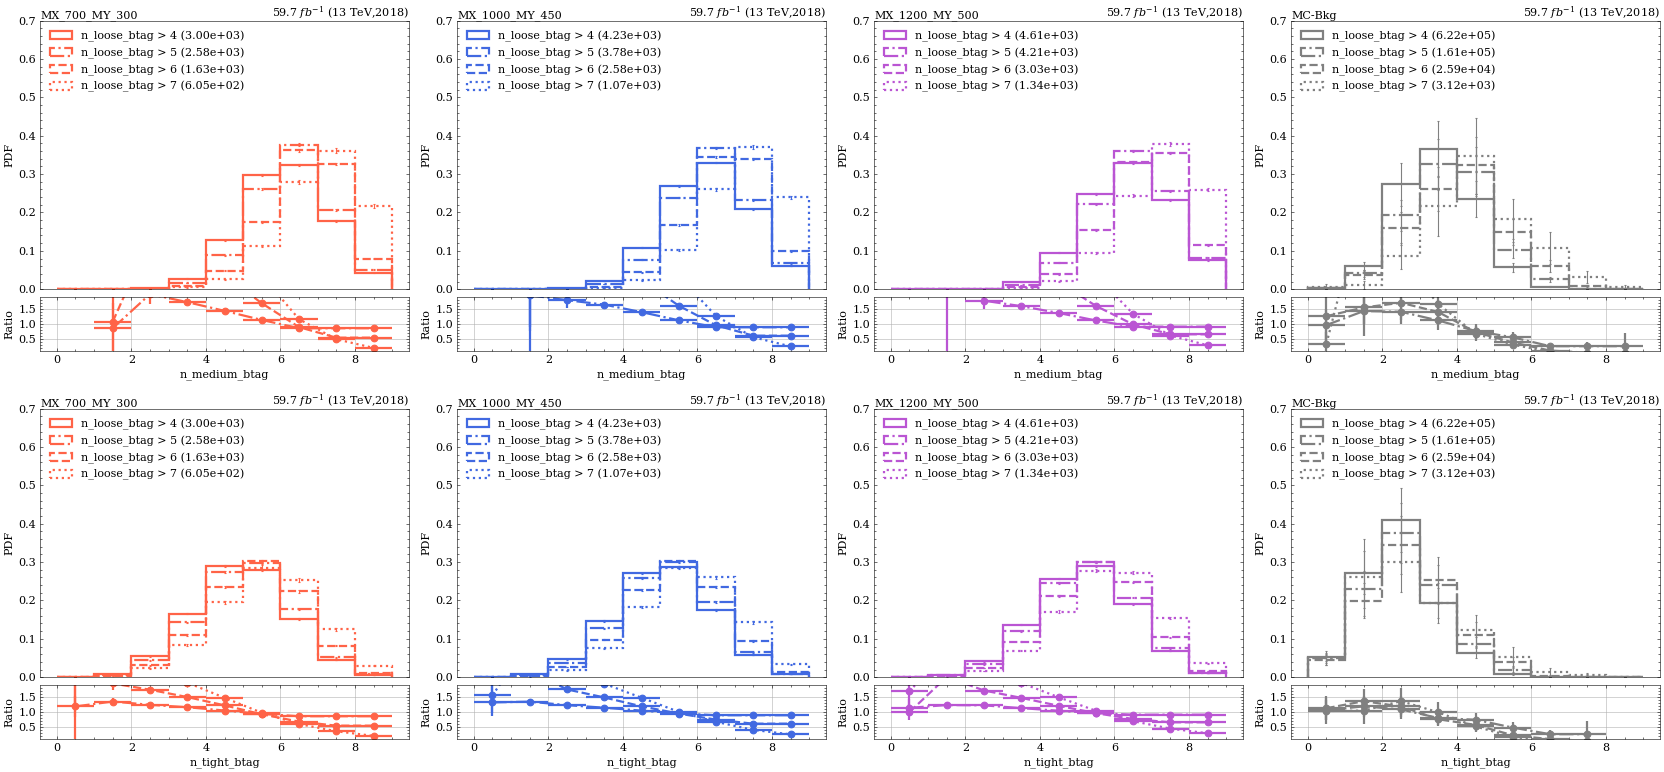

In [19]:
study.compare_masks(
    signal, bkg, legend=True,
    # h_label_stat='$\mu$={stats.mean:0.1f}, N={stats.nevents:0.1e}',
    masks=[lambda t:t.n_loose_btag > 4, lambda t:t.n_loose_btag > 5, lambda t:t.n_loose_btag > 6, lambda t:t.n_loose_btag > 7,],
    label=[ 
        'n_loose_btag > 4',
        'n_loose_btag > 5',
        'n_loose_btag > 6',
        'n_loose_btag > 7',
    ],
    varlist=['n_medium_btag','n_tight_btag'],
    binlist=[np.arange(10)]*2,
    efficiency=True,
    ylim=(0,0.7),
    ratio=True,
)

100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


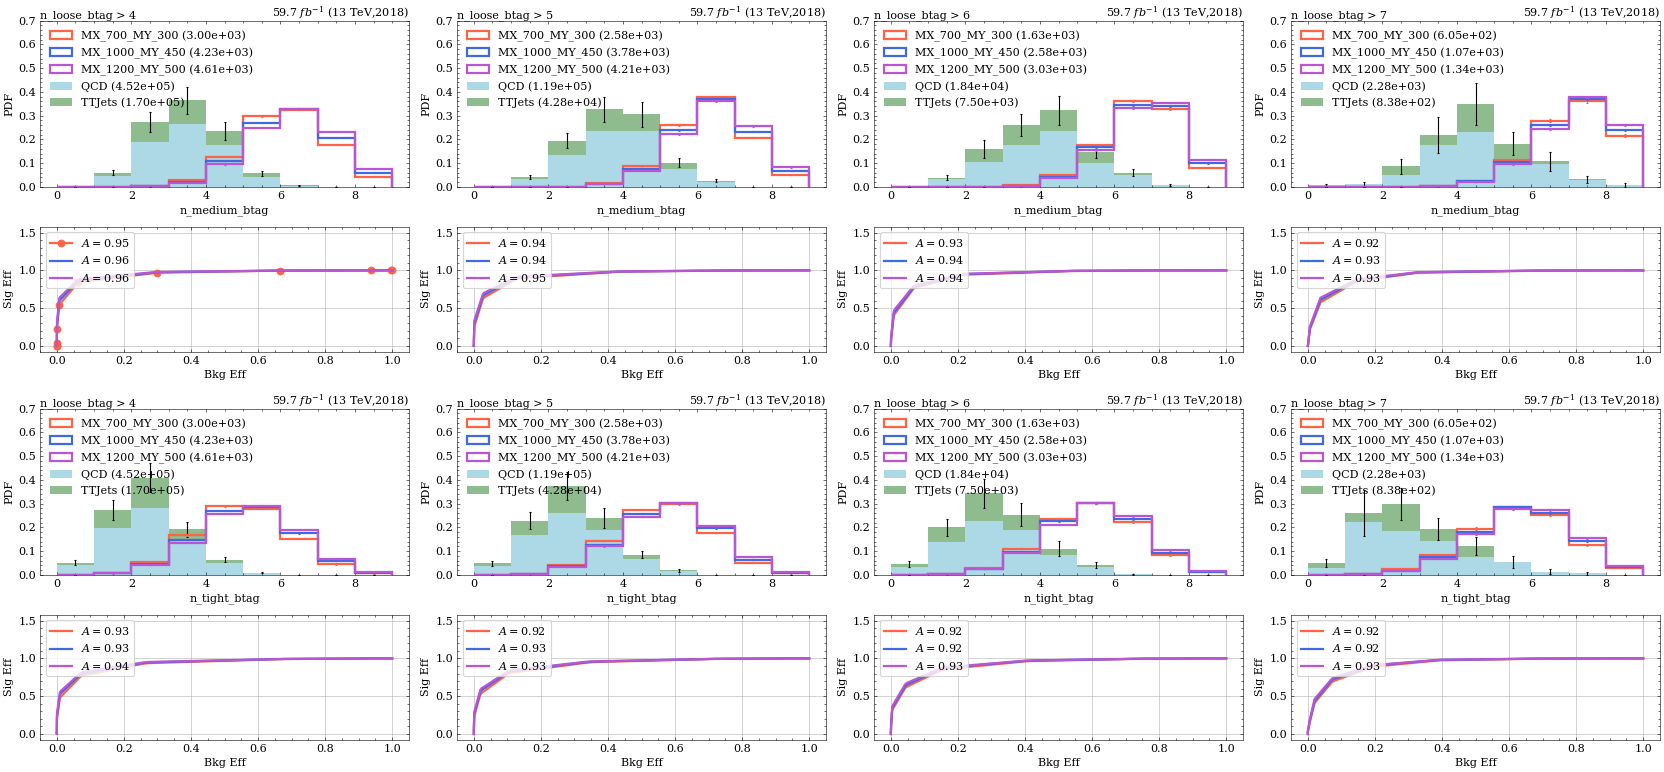

In [26]:
study.compare_masks_by_sample(
    signal, bkg, legend=True,
    # h_label_stat='$\mu$={stats.mean:0.1f}, N={stats.nevents:0.1e}',
    masks=[lambda t:t.n_loose_btag > 4, lambda t:t.n_loose_btag > 5, lambda t:t.n_loose_btag > 6, lambda t:t.n_loose_btag > 7,],
    label=[ 
        'n_loose_btag > 4',
        'n_loose_btag > 5',
        'n_loose_btag > 6',
        'n_loose_btag > 7',
    ],
    varlist=['n_medium_btag','n_tight_btag'],
    binlist=[np.arange(10)]*2,
    efficiency=True,
    ylim=(0,0.7),
    **study.auroc,
)